Tải dữ liệu MNIST...


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Trích xuất đặc trưng HOG...
Huấn luyện mô hình SVM...
🎯 Độ chính xác của mô hình: 97.69%


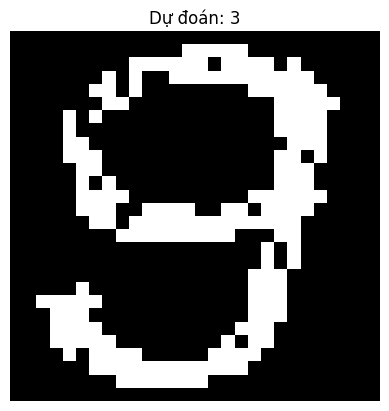

🔢 Chữ số dự đoán: 3


In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.feature import hog
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score

# 1. Tải dữ liệu MNIST
print("Tải dữ liệu MNIST...")
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist.data, mnist.target

# 2. Chuyển đổi dữ liệu về dạng ảnh 28x28
X = X.reshape(-1, 28, 28).astype(np.uint8)

# 3. Hàm trích xuất đặc trưng HOG
def extract_hog_features(images):
    features = []
    for img in images:
        img = cv2.resize(img, (28, 28))  # Đảm bảo kích thước 28x28
        hog_features = hog(img, orientations=9, pixels_per_cell=(4,4), cells_per_block=(2,2), visualize=False)
        features.append(hog_features)
    return np.array(features)

# 4. Trích xuất đặc trưng từ tập dữ liệu
print("Trích xuất đặc trưng HOG...")
X_hog = extract_hog_features(X)

# 5. Chia dữ liệu thành tập train và test
X_train, X_test, y_train, y_test = train_test_split(X_hog, y, test_size=0.2, random_state=42)

# 6. Huấn luyện mô hình SVM
print("Huấn luyện mô hình SVM...")
model = SVC(kernel="linear")
model.fit(X_train, y_train)

# 7. Đánh giá mô hình trên tập test
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"🎯 Độ chính xác của mô hình: {accuracy * 100:.2f}%")

# 8. Hàm dự đoán chữ số từ ảnh mới
def predict_digit(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Đọc ảnh
    img = cv2.resize(img, (28, 28))  # Resize về 28x28 pixel
    _, img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)  # Nhị phân hóa

    # Trích xuất đặc trưng HOG
    features = hog(img, orientations=9, pixels_per_cell=(4,4), cells_per_block=(2,2), visualize=False)
    features = features.reshape(1, -1)

    # Dự đoán bằng mô hình SVM
    prediction = model.predict(features)
    
    # Hiển thị ảnh
    plt.imshow(img, cmap="gray")
    plt.title(f"Dự đoán: {prediction[0]}")
    plt.axis("off")
    plt.show()

    return prediction[0]

# 9. Kiểm thử với ảnh chữ số viết tay mới
image_path = "/kaggle/input/anhso9/images.jpg"  # Đổi đường dẫn ảnh tùy theo ảnh chữ số của bạn
predicted_digit = predict_digit(image_path)
print(f"🔢 Chữ số dự đoán: {predicted_digit}")
